# Applications

Here, I am working up a few probabilistic applications of the ideas for the paper on the Age Area Hypothesis. 

In [1]:
import copy
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams["figure.figsize"] = (12,8)

from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from adjustText import adjust_text

start_dir = os.getcwd()
python_dir = pathlib.Path(os.getcwd()).parts[:-1] + ('Python',)
os.chdir(pathlib.Path(*python_dir))

from PyInstEvo import *

os.chdir(start_dir)
os.chdir('..')

pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=120)

%matplotlib inline

In [2]:
Data = pd.read_pickle(os.getcwd() + '//IEData//MasterData.pkl')
Splits = pd.read_pickle(os.getcwd() + '//IEData//Splits.pkl')
Depths = pd.read_pickle(os.getcwd() + '//IEData//Depths.pkl')

We can declare a class using the "ResolvedTree" class. Here it is:

# One Example

Initiation of a tree using the old method. Traditionally, we have instituted the whole procedure from a data frame as follows, so one idea might be to work with that. So, we can do:

In [3]:
UY = PhyloTree(Data.loc[Data['ruhlen_1'] == 'URALICYUK'], 'test')

In [4]:
UralicYukRT = ResolvedTree(Data.loc[Data['ruhlen_1'] == 'URALICYUK'], 'UYTree1')  #Create a resolved tree
numbranches = UralicYukRT.interiorbranches                                        #Get no. of interior branches
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)      #Make a conformable set of parameters
rInit       = np.zeros((1, len(UralicYukRT.words)))                                            #initial rate parameters
dparms      = np.sum(UralicYukRT.deathmat[:,0] == 0)                                           #Number of death parameters needed
dInit       = np.zeros((1, dparms)) + 1                                                      #Values for death parameters
eInit       = np.matrix(5)                                                                   #Overall depth parameter
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

Initiating from Data Frame...


So, we see that a resolved tree has a few more things in it than a simple tree, most of which pertains to the way in which the tree was randomly resolved. 

To use the methods, we need a bunch of things first.

In [5]:
def DFill():
    words = ['word1', 'word2', 'word3', 'word11', 'word12', 'word18', 'word19',
           'word21', 'word22', 'word23', 'word25', 'word28', 'word30', 
           'word31', 'word34', 'word39', 'word40', 'word41', 'word43', 
           'word44', 'word47', 'word48', 'word51', 'word53', 'word54', 
           'word57', 'word58', 'word61', 'word66', 'word72', 'word74',
           'word75', 'word77', 'word82', 'word85', 'word86', 'word92', 
           'word95', 'word96', 'word100']
        
    namelist = [ 'TR' + str(x) for x in range(1, 17) ]  

    dim1 = len(words)
    DogList = ['p', 't', 's', 'c', 'm', 'N', 'l', 'w', 'y', 'i']

    # Creates a list of all the names of states variables. 
    
    statenames=[]
    for i in range(0, dim1):
        for j in range(0, 10):
            statenames.append(words[i] + str(i) + '_' + DogList[j])    

    A={}
    for a in namelist + statenames + ['name', 'lat', 'lon', 'deadOne', 'ex_date', 'ex_date_sd']:
        A[a] = [0]

    DF = pd.DataFrame(A)    
    return(DF)

Now, we can make a base tree with really no attributes and we can fill in various things as we go. So:

In [6]:
SemiticTree = PhyloTree(DFill(), 'Test')

We will try and fill in a tree with the basic details of the following Tree, as estimated in the paper. Note that we should be able to calibrate the branches to have roughly the standard errors in the Tree...

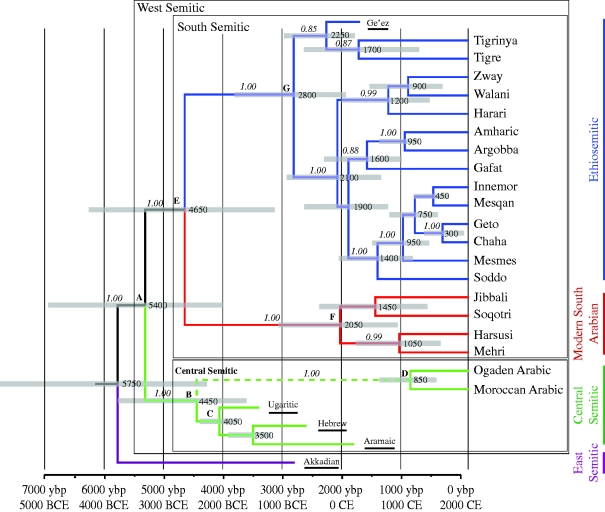

In [7]:
file = os.getcwd() + '\\SavedFigures\\rspb20090408fig2.jpg'
Image(filename = file)

In [8]:
names = ['Ge`ez', 'Tigrinya', 'Tigre', 'Zway', 'Walani', 'Harari', 'Amharic', 'Argobba', 'Gafat',
         'Innemor', 'Mesqan', 'Geto', 'Chaha', 'Mesmes', 'Soddo', 'Jibbali', 'Soqotri',
         'Harsusi', 'Mehri', 'Ogaden Arabic', 'Moroccan Arabic', 'Ugaritic', 'Hebrew', 'Aramaic', 'Akkadian']

names_to_add = []
for name in names:
    names_to_add.append([name])

Next, we can add in the current day location of each people. We can get these from the Ethnographic Atlas or by just looking them up. Coordinates are longitude, then latitude:

In [9]:
locs = {'Ge`ez': [41., 12.94], 'Tigrinya': [39., 14.], 'Tigre': [39., 17.],
        'Zway': [38.72, 7.93], 'Walani': [36.5, 6.5], 'Harari': [36.4, 9.65],
        'Amharic': [39.2, 12.5], 'Argobba': [38.72, 10.67], 'Gafat': [37, 12.2],
        'Innemor': [36.67, 8.33], 'Mesqan': [38.38, 8.12], 'Geto': [39.2, 8.2], 
        'Chaha': [39.6, 8.9], 'Mesmes': [37.1, 7.5], 'Soddo': [42.85, 6.6],
        'Jibbali': [54.84, 17.27], 'Soqotri': [53.77, 12.55],
        'Harsusi': [55.9, 19.91], 'Mehri':[51.66, 17.06], 
        'Ogaden Arabic':[44.58, 7.39], 'Moroccan Arabic':[-6.93, 32.64],
        'Ugaritic': [35.79, 35.60], 'Hebrew':[34.88, 31.66], 'Aramaic': [40.08, 36.30],
        'Akkadian':[46.5, 32.05] }

lats = []
lons = []
for item in locs:
    lons.append(locs[item][0])
    lats.append(locs[item][1])

In [10]:
SemiticTree.name = np.matrix(names_to_add)

In [11]:
plt.scatter(lons, lats)
mplleaflet.display()

C:\Users\mjbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Which looks about right. In any event, next we have:

In [12]:
SemiticTree.lat = np.array(lats)
SemiticTree.lon = np.array(lons)
SemiticTree.D = gcircledist(SemiticTree.lat, SemiticTree.lon)

Here we fill in the tree matrix and the so called "Death Matrix." Note that all extant language groupings have a 1 as their first entry. (So what is the 10 for?) The DeData is the data on the Death date, I think. 

In [13]:
TMat = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6],
        [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9],
        [0, 1, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 12, 13],
        [0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 8, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]

DMat = [[0, .4], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [0, .1], [0, .1], [0, .1], [0, .1]]

DeData = [[200, 25], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50],
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [-1200, 25], [-600, 25], [-200, 25], [-800, 25]]

Now, we can add this information to our nascent tree as follows:

In [14]:
SemiticTree.BaseTree = np.matrix(TMat).transpose()
SemiticTree.deathmat = np.matrix(DMat)
SemiticTree.deathdata = np.matrix(DeData)
SemiticTree.states = np.matrix(np.zeros((25, 400)))

This should be enough to declare everything as we see fit...

In [15]:
STR = ResolvedTree(SemiticTree, 'Semitic Tree')

Initiating from basic tree with user-provide matrices.


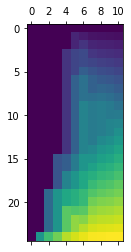

In [16]:
STR.matplot()

In [17]:
numbranches = STR.interiorbranches                                        
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(5)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

In [18]:
bInit = np.ones((1, numbranches))*(-3)

In [19]:
dInit

array([[1., 1., 1., 1., 1.]])

To be clear, in the above, the branch parameters are given in `bInit`, while the `rInit` pertain to the rate changes for words. The dparms are the parameters that do the "back" correction for the matrix, while the eInit parameter is the overall depth of the tree. 

In [20]:
STP = ParameterizedTree(SemiticTree, 'test', parmsInit)

Initiating from basic tree with user-provide matrices.


Inserting time splits derived from the paper before we go any further. We have:

In [21]:
splits = pd.DataFrame([['Semetic', 'Akkadian', 'Aramaic',  5750, 25],
                       ['Semetic', 'Akkadian', 'Tigrinya', 5750, 25],
                       ['Semetic', 'Ge`ez', 'Tigrinya',     2250, 25],
                       ['Semetic', 'Tigrinya', 'Tigre',    1700, 25], 
                       ['Semetic', 'Zway', 'Walani',        900, 25],
                       ['Semetic', 'Harari', 'Walani',     1200, 25],
                       ['Semetic', 'Amharic', 'Argobba',    950, 25],
                       ['Semetic', 'Amharic', 'Gafat',     1600, 25],
                       ['Semetic', 'Innemor', 'Mesqan',     450, 25],
                       ['Semetic', 'Geto', 'Chaha',         300, 25],
                       ['Semetic', 'Tigrinya', 'Chaha',               2800, 25],
                       ['Semetic', 'Jibbali', 'Soqotri',              1450, 25],
                       ['Semetic', 'Mehri', 'Walani',                 4650, 25],
                       ['Semetic', 'Harsusi', 'Mehri',                1050, 25],
                       ['Semetic', 'Ogaden Arabic', 'Moroccan Arabic', 850, 25],
                       ['Semetic', 'Ugaritic', 'Hebrew',              4050, 25],
                       ['Semetic', 'Hebrew', 'Tigrinya',              5400, 25],
                       ['Semetic', 'Hebrew', 'Aramaic',               3500, 25],
                       ['Semetic', 'Moroccan Arabic', 'Aramaic',      4450, 25],
                       ['Semetic', 'Soqotri', 'Harsusi',              2050, 25],
                       ['Semetic', 'Soddo', 'Innemor',                1400, 25],
                       ['Semetic', 'Mesmes', 'Chaha',                  950, 25],
                       ['Semetic', 'Soddo', 'Gafat',                  1900, 25],
                       ['Semetic', 'Soddo', 'Walani',                 2100, 25]])

In [22]:
STP.splitinfo(splits)
STP.priordepth(7.2, 6.2)
STP.settimes()

In [23]:
np.nansum(STP.filledtimeFractions, axis=1)

array([0.77095926, 1.        , 1.        , 1.        , 1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.70321084, 0.77194844, 0.77194844, 0.41163285])

In [87]:
np.round(STP.filledtimeFractions, 3), STP.name

(array([[0.076, 0.044, 0.125, 0.303, 0.054,   nan,   nan,   nan,   nan,   nan, 0.107],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.114,   nan,   nan,   nan,   nan, 0.284],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.114,   nan,   nan,   nan,   nan, 0.284],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.185, 0.057,   nan,   nan,   nan, 0.156],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.185, 0.057,   nan,   nan,   nan, 0.156],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.185,   nan,   nan,   nan,   nan, 0.213],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.057, 0.067, 0.114,   nan,   nan, 0.16 ],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.057, 0.067, 0.114,   nan,   nan, 0.16 ],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.057, 0.067,   nan,   nan,   nan, 0.273],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.057, 0.105, 0.042, 0.078, 0.047, 0.07 ],
        [0.076, 0.044, 0.125, 0.303, 0.054, 0.057, 0.105, 0.042, 0.078, 0.047, 0.07 ],
        [0.076, 0.044, 0.125, 0.303, 0.054,

The following is a parameterized tree that fairly closely approximates the tree in the article... 

-6792.925763950855 -585.3216492840306


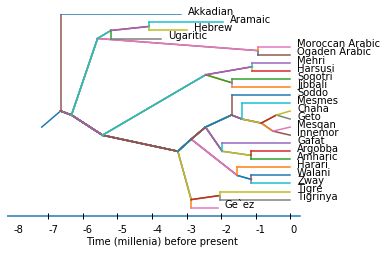

In [24]:
btouse = np.matrix([[-.4, .1, -.399, -.34, -1.54, -1.01, -1.4, -.814, -0.914, -.14, -1.78, -1.3, -2, 
                     -2, -.8, .21, 1.6, -2.6, 
                     -.4, .2, -1.8, -2, -3, -2.5]])
# In reverse order:
# Root 
# Akkadian Split
# Break up of Arabic - the (-2.6) is the breakup of Aramaic, Hebrew and Ugaritic
# (-2) IS THE breakup of the soddo-geez group
# (-1.78 is the breakup of soddo-amharic group)
# -0.914 is the Tigre-Tigrinya split
# -1.01 is the Walani-Zway split
# -2.54 is the mesmes-innemor breakup
# -3.9999 is the Chat Geto Mesqan Innemor breakup

dtouse = np.matrix([[1, .95, 1, -.1, -.10]])

STP.bparms = btouse
STP.dparms = dtouse
STP.settimes()
print(STP.SplitLikelihood(), STP.DeathLikelihood())
STP.showtree()


In [25]:
STP.OriginLikelihood()

array([-119.9187953 , -120.14557792, -120.14557792, -134.12342753, -134.12342753, -133.36272835, -149.16469017,
       -149.16469017, -147.99881322, -157.67991166, -157.67991166, -157.67991166, -157.67991166, -149.42860152,
       -148.27960464, -112.59279895, -112.59279895, -112.59279895, -112.59279895,  -97.42653013,  -97.42653013,
        -98.20284072,  -99.46819421,  -99.08099221,  -65.78321217])

In [26]:
STP.DeathLikelihood(), STP.SplitLikelihood()

(-585.3216492840306, -6792.925763950855)

It remains to be seen if the above actually is working the way we intended it to. In any event, we shall check that rigorously later. 

# Tuning to match another Tree - Formal Method

Here, we use a simple algorithm to match the tree to another tree that is given in a book or something, with the ultimate aim of using the given tree to choose locations. How do we work between Trees and copies?

So, an MCMC algorithm will propose changes to each parameter, and then compare log likelihoods so as to take the one that matches things best. Anyways, we can modify our MCMC algorithm as follows - I will use a mwg sampler first, as the extension to a global sampler isn't that bad. 

One thing to be careful about - you want initialization to note use old things that might be hanging around!

In [27]:
numbranches = STP.interiorbranches

bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(0)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit))

In [28]:
Told = ParameterizedTree(SemiticTree, 'mcmc', parmsInit)
Told.splitinfo(splits)
Told.priordepth(5, 6)
Told.settimes()

Initiating from basic tree with user-provide matrices.


In [29]:
draws  = 100
burn   = 20
damper = .5
aopt   = .25

xold = np.hstack((bInit, dInit, eInit))              # Complete vector of parameters
nb    = np.shape(xold)[1]                     # Number of parameters
bdim  = np.shape(bInit)[1]                     # Break point between branch and death parameters

lam   = 2.38**2 / nb*np.ones((1, nb))           # adaptation parameter
 
val = []                                       # holder for likelihood
Accept = np.zeros((1, nb))                     # Acceptances
alpha  = np.zeros((1, nb))                     # alpha probability of acceptance
xs     = []                                    # place older for parameter values
mu     = np.array(xold).flatten()             # mean of proposal distribution (not needed for this routine)

Vinit = np.eye(nb)                             # Initial variance for proposals

old = Told.SplitLikelihood() + Told.DeathLikelihood()
print(old)

-23513.2894857921


In [30]:
Told.SplitLikelihood(), Told.DeathLikelihood()

(-18992.77488082169, -4520.514604970411)

In [31]:
for i in np.arange(draws):
    accept = np.zeros((1, nb))
    
    for j in range(nb):
        Tnew = copy.deepcopy(Told)
        xnew = copy.deepcopy(xold)
        xnew[0, j] = xold[0, j] + multivariate_normal.rvs(0)*np.sqrt(Vinit[j, j])*lam[0, j]
        bParms = xnew[:, 0:bdim]
        dParms = xnew[:, bdim:-1]
        eParms = xnew[:, -1][0, 0]
        
        Tnew.bparms = bParms
        Tnew.dparms = dParms
        Tnew.eparms = eParms
        Tnew.settimes()        
        
        pro    = Tnew.SplitLikelihood() + Tnew.DeathLikelihood()
     
        if np.isnan(xnew[0, j]):
            alpha[0, j] = 0
        elif pro > old:
            alpha[0, j] = 1
        else:
            alpha[0, j] = np.exp(pro - old)
            
        if np.random.uniform(0, 1) < alpha[0, j]:
            old = pro
            xold = xnew[:]
            accept[0, j] = 1
            Told = copy.deepcopy(Tnew)
        
        if np.random.uniform(0, 1) > .999:
            print(i, old)
    
    xs.append(xold)        
    val.append(old)
    lam = lam*np.exp(1/(i + 1)**damper*(alpha - aopt))
    Accept = np.vstack((Accept, accept))

0 -23423.089494228327
25 -724.3624006662695
50 -142.71094196105153
62 -102.02419589434766


C:\Users\mjbaker\documents\github\InstEvo\Python\PyInstEvo.py:291: RuntimeWarning: invalid value encountered in true_divide
  V[:,i:i+1] = F[:,i-1:i]*(np.exp(Z[:,i:i+1]) + a)*r/(1 + np.exp(Z[:,i:i+1]) + a)
C:\Users\mjbaker\documents\github\InstEvo\Python\PyInstEvo.py:292: RuntimeWarning: invalid value encountered in multiply
  F[:,i:i+1] = F[:,i-1:i]*(1 + (1 - r)*(np.exp(Z[:,i:i+1])+a))/(1 + np.exp(Z[:,i:i+1] + a))


72 -89.39396013934089
76 -86.91351907290849
98 -67.64426243513518


In [32]:
Told.DeathLikelihood(), Told.SplitLikelihood()

(-9.403846574559273, -58.33787212576511)

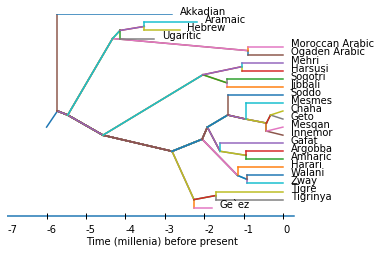

In [33]:
Told.showtree()

In [34]:
Told.OriginLikelihood()

array([ -99.85925767, -100.00635308, -100.00635308, -120.08196016, -120.08196016, -119.27297586, -128.51430794,
       -128.51430794, -127.31119804,           nan,           nan,           nan,           nan, -145.29469938,
       -133.02762896,  -86.63870433,  -86.63870433,  -86.63870433,  -86.63870433,  -66.05949183,  -66.05949183,
        -66.44601589,  -67.49245065,  -67.23770711,  -32.57519156])

In [35]:
tmat = np.round(Told.filledtimeFractions*Told.depth)

In [36]:
np.savetxt('C:\\users\\mjbaker\\documents\\python scripts\\tree.txt', tmat, fmt='%.2e')

In [37]:
def OL2(PT, timescale=1000, distances=True, distancescale=1, usetimes=True):
    
    TM       = PT.resolvedtree 
    bp       = PT.branchpositions      
    bp       = bp[rows(TM):]
    branches = PT.filledtimeFractions*PT.depth*timescale
 
    LL       = np.zeros(rows(TM))
    LL_D     = np.zeros(rows(TM))
    NN       = np.zeros(rows(TM))        
    TT       = branches[:, -1]
    DD       = np.zeros(rows(TM))
    Live     = np.zeros(rows(TM))
        
    D         = np.copy(PT.D) / distancescale
    np.fill_diagonal(D, 1)
    
    lnD = - np.log(D)
    
    if distances == False:
        lnD       = np.zeros(np.shape(lnD))
        
    afac = 1
    
    if usetimes == False:
        afac = 0
    
    for bb in bp:
        r, c    = bb[0], bb[1]
        id      = TM[r, c]
        tu      = np.where(TM[:, c] == id)[0]
        bhat    = branches[tu, c]
        THat    = TM[tu, c:]
        NNCount = NN[tu] + 1
        TTCount = TT[tu] + bhat
        LLHat   = LL[tu]

        for p in tu:
            if Live[p] == 1:
                LL[p]   = LL[p] + NN[p] * (np.log(NN[p]) - np.log(TT[p]))
                LL_D[p] = LL_D[p] + DD[p]
    
        LL_DHat = LL_D[tu]

        DHat    = (lnD[tu, :])[:, tu]
     
        z = 0
        while True:
            ids  = uniq(THat[:, z])
            nums = THat[:, z]
            z    = z + 1
            if len(ids) > 1:
                break
         
        TTHat = np.zeros(len(nums))
        NNHat = np.zeros(len(nums))
        DDHat = np.zeros(len(nums))
     
        for m in ids:
            posi   = np.where(nums == m)[0]
            posni  = np.where(nums != m)[0]
            toAdd  = TTCount[posni]
            for q in posi:
                maxFinder = NNCount[posni]*(np.log(NNCount[posni]) \
                    - np.log(toAdd)) + LL_DHat[posni] + DHat[q, posni] + LLHat[posni]
                maxm      = np.argmax(maxFinder)
                TTHat[q]  = toAdd[maxm]
                NNHat[q]  = NNCount[posni[maxm]]
                DDHat[q]  = DHat[q, posni[maxm]] + LL_DHat[posni[maxm]]
     
        for p in range(0, rows(tu)):
            TT[tu[p]] = TTHat[p]
            NN[tu[p]] = NNHat[p]
            DD[tu[p]] = DDHat[p]
            if Live[tu[p]] == 0:
                Live[tu[p]] = 1
    
    for p in tu:
        if Live[p] == 1:
            LL[p]   = LL[p] + NN[p] * (np.log(NN[p]) - afac*np.log(TT[p]))
            LL_D[p] = LL_D[p] + DD[p]    
        
    return LL_D + LL

In [38]:
vals = OL2(Told, timescale=1, distances=False, distancescale=1000, usetimes=True)

In [39]:
probs = np.exp(vals)/np.sum(np.exp(vals))

In [40]:
for i in range(len(probs)):
    print(Told.name[i][0][0], np.round(probs[i], 4), vals[i])

[['Ge`ez']] nan -3.1506837665768517
[['Tigrinya']] nan -3.2977791720254572
[['Tigre']] nan -3.2977791720254572
[['Zway']] nan -2.6501204146823483
[['Walani']] nan -2.6501204146823483
[['Harari']] nan -1.8411361200522156
[['Amharic']] nan -4.174712918397483
[['Argobba']] nan -4.174712918397483
[['Gafat']] nan -2.971603022297611
[['Innemor']] nan nan
[['Mesqan']] nan nan
[['Geto']] nan nan
[['Chaha']] nan nan
[['Mesmes']] nan -0.23183851998899407
[['Soddo']] nan -1.7802786559174029
[['Jibbali']] nan -3.7456409792043006
[['Soqotri']] nan -3.7456409792043006
[['Harsusi']] nan -3.7456409792043006
[['Mehri']] nan -3.7456409792043006
[['Ogaden Arabic']] nan -3.8896943176079386
[['Moroccan Arabic']] nan -3.8896943176079386
[['Ugaritic']] nan -4.276218376983618
[['Hebrew']] nan -5.322653135791328
[['Aramaic']] nan -5.067909599809679
[['Akkadian']] nan 1.9635848313717608


C:\Users\mjbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


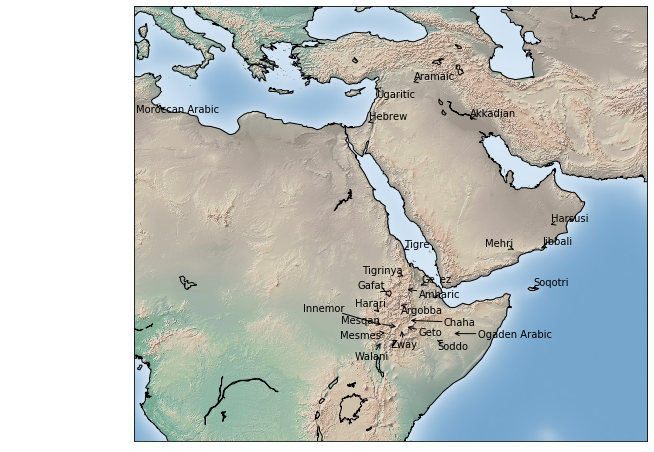

In [49]:
y = np.asarray(Told.lat.astype(float)).flatten().tolist()
x = np.asarray(Told.lon.astype(float)).flatten().tolist()
     
Order=np.asarray(Told.resolvedtree[:,-1]).astype(int).flatten()

y = [y[i] for i in Order]
x = [x[i] for i in Order]
        
name = np.asarray(Told.name).flatten().tolist()
vz = np.min(vals)
s = [80*n for n in vals-np.min(vals)]
    
myfig = plt.figure(figsize=(10, 8))
    
h = 3000
    
m = Basemap(llcrnrlon=8, llcrnrlat=-5,urcrnrlon=67,urcrnrlat=45, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='lightgray', zorder=0)
m.shadedrelief()
  
#m.scatter(x, y, s=s, c=s, cmap='Reds', linewidths=1, latlon=True)
m.scatter(x, y, s=s, edgecolors='black', linewidths=2, facecolors='none')

xpt, ypt = m(x, y)

texts = [plt.text(xpt[i], ypt[i], name[i], ha='center', va='top') for i in range(len(name))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

myfig.show()

In [84]:
np.round(Told.filledtimeFractions, 6), Told.name

(array([[0.045995, 0.043567, 0.149001, 0.292472, 0.092638,      nan,      nan,      nan,      nan,      nan, 0.076616],
        [0.045995, 0.043567, 0.149001, 0.292472, 0.092638, 0.091385,      nan,      nan,      nan,      nan, 0.284942],
        [0.045995, 0.043567, 0.149001, 0.292472, 0.092638, 0.091385,      nan,      nan,      nan,      nan, 0.284942],
        [0.045995, 0.043567, 0.149001, 0.292472, 0.127169, 0.149909, 0.040602,      nan,      nan,      nan, 0.151285],
        [0.045995, 0.043567, 0.149001, 0.292472, 0.127169, 0.149909, 0.040602,      nan,      nan,      nan, 0.151285],
        [0.045995, 0.043567, 0.149001, 0.292472, 0.127169, 0.149909,      nan,      nan,      nan,      nan, 0.191886],
        [0.045995, 0.043567, 0.149001, 0.292472, 0.127169, 0.022227, 0.053491, 0.108875,      nan,      nan, 0.157202],
        [0.045995, 0.043567, 0.149001, 0.292472, 0.127169, 0.022227, 0.053491, 0.108875,      nan,      nan, 0.157202],
        [0.045995, 0.043567, 0.149001, 0

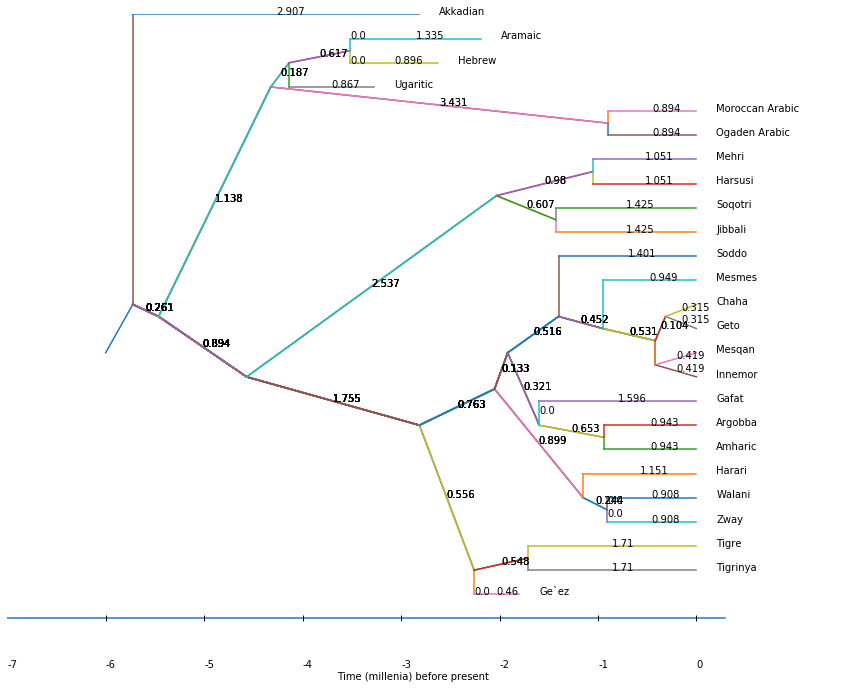

In [43]:
TFR = Told.depth*Told.filledtimeFractions
Tree = Told.resolvedtree.astype(int)
Num = np.matrix(np.arange(0, rows(Tree))).T
names = np.array(Told.name)

mildepth = np.nansum(TFR, axis=1).max().round().astype(int)
        
# Some place holders for translating the tree into data
            
minPos = J(rows(Tree), cols(Tree), np.nan)
maxPos = J(rows(Tree), cols(Tree), np.nan)
avePos = J(rows(Tree), cols(Tree), np.nan)
            
        # Roll through the tree and positions point and lines accordingly.
            
for i in range(0, cols(Tree)):
    m=ps(Tree, i)
    for j in range(0, rows(m)):
        bracketed = psm(Num, m, j)
        lowest = min(bracketed)
        highest = max(bracketed)
        minPos[m[j,0]:m[j,1]+1,i:i+1] = J(1 + m[j,1] - m[j,0], 1, lowest)
        maxPos[m[j,0]:m[j,1]+1,i:i+1] = J(1 + m[j,1] - m[j,0], 1, highest)
        average = np.mean(bracketed)
        avePos[m[j,0]:m[j,1]+1,i:i+1] = J(1 + m[j,1] - m[j,0], 1, average)

        # Block of code to to compile tree running sums. 
            
runningsum = np.copy(TFR[:,0:1])
for i in range(1,cols(TFR)):
    runningsum=np.hstack((runningsum, np.copy(np.matrix(np.nansum(TFR[:,:i+1],axis=1)).T)))
            
        # Reorganize the numbers so that the x-axis is the depth of the tree
            
depth = np.max(runningsum)
runningsum = runningsum - depth

        # Plot the root of the tree...

fig, ax = plt.subplots(figsize=(15, 12))
     
ax.plot([-depth,-depth + TFR[0,0]], [(rows(TFR) - 1)/2,(rows(TFR) - 1)/2 + 2])

dag = ax.axhline(y=1, xmin=0, xmax=mildepth/(mildepth + 1))
        
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
        
text = []
for c in range(0, cols(TFR) - 1):
    for r in range(0, rows(Tree)):
        y = [avePos[r,c] + 2, avePos[r,c+1] + 2]
        x = [runningsum[r,c], runningsum[r,c+1]]
        ax.plot(x, y)
        
        if (x[1]-x[0]) != 0.0:
            #text1 = ax.text(np.mean(x), np.mean(y), np.round(x[1]-x[0],3))
            text.append(ax.text(np.mean(x), np.mean(y), np.round(x[1]-x[0],3)))
        ax.axis([-depth - 1,np.max(runningsum) + 1.5, -1, rows(Tree) + 1], yticks='none')
        
names = list(names)        
for n in range(0, len(names)):
    ax.annotate(names[n][0], xy = (runningsum[n,-1] + .2, n + 2)) 
          
for a in range(0, mildepth + 2):
    if a != 0:
        ax.annotate('-'+str(a), xy = (-a, -1))
    else:
        ax.annotate(str(a), xy= (a, -1))
            
        for a in range(0, mildepth + 1):
            ax.plot(-a, 1, '|', color='black')
            
        ax.set_xlabel('Time (millenia) before present        ')

In [94]:
vals = np.unique(np.asarray(Tree[:, 0]))

In [96]:
A = np.zeros(shape=(len(vals), 2))

In [48]:
np.round(Told.D, 3)

array([[   0.   ,  246.371,  500.083,  610.474,  869.585,  620.935,  201.332,  354.059,  441.965,  697.73 ,  607.821,
         562.728,  474.643,  740.407,  733.722, 1561.629, 1385.901, 1767.168, 1233.167,  731.13 , 5325.621, 2574.006,
        2174.082, 2599.874, 2198.365],
       [ 246.371,    0.   ,  333.679,  675.835,  877.861,  560.509,  168.239,  371.631,  294.994,  679.933,  657.5  ,
         645.482,  571.01 ,  752.159,  924.494, 1734.516, 1606.746, 1912.931, 1398.37 ,  954.983, 5079.797, 2423.828,
        2008.608, 2482.679, 2147.638],
       [ 500.083,  333.679,    0.   , 1009.28 , 1199.089,  864.516,  500.98 ,  704.711,  575.624,  996.86 ,  989.976,
         979.032,  903.273, 1076.591, 1230.137, 1683.421, 1663.082, 1811.3  , 1346.162, 1228.628, 4908.106, 2093.049,
        1682.731, 2149.307, 1836.457],
       [ 610.474,  675.835, 1009.28 ,    0.   ,  292.068,  318.789,  511.011,  304.76 ,  510.909,  230.065,   42.998,
          60.796,  144.966,  184.85 ,  479.076, 2032.78 ,

In [101]:
    for i in range(0, len(vals)):
        spots = np.where(Tree[:,col] == vals[i])
        A[i,0],A[i,1] = spots[0][0], spots[0][-1]

In [103]:
A.astype(int)

array([[ 0, 24]])

In [120]:
Told.showparameters()

Branch parameters:     [[ 1.52219787e-01  8.64736007e-01 -5.68155189e+00 -5.25791516e-01 -8.29029141e-01 -1.15327814e+00 -1.45181255e+00
  -8.95451535e-01 -1.26794097e+00 -3.25953760e-01 -2.52337019e+00 -1.94329732e+00 -1.23364934e+00 -1.04083254e+00
  -8.18489167e-01 -9.43748406e-02  1.43256426e+00 -2.26796091e+00 -4.68313990e-01  2.35126008e-01 -1.72096071e+00
  -1.50624802e+00 -2.79338947e+00 -5.11364291e+03]]
Rate parameters (ln):  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
Death parameters:      [[ 1.41200463  1.26860847  1.06575767  0.50954645 -0.06966893]]
Overall depth parms:   -1.1914962065688326



In [53]:
Told.branchpositions

array([[ 0, 10],
       [ 1, 10],
       [ 2, 10],
       [ 3, 10],
       [ 4, 10],
       [ 5, 10],
       [ 6, 10],
       [ 7, 10],
       [ 8, 10],
       [ 9, 10],
       [10, 10],
       [11, 10],
       [12, 10],
       [13, 10],
       [14, 10],
       [15, 10],
       [16, 10],
       [17, 10],
       [18, 10],
       [19, 10],
       [20, 10],
       [21, 10],
       [22, 10],
       [23, 10],
       [24, 10],
       [10,  9],
       [12,  9],
       [12,  8],
       [ 7,  7],
       [13,  7],
       [ 4,  6],
       [ 8,  6],
       [14,  6],
       [ 2,  5],
       [ 5,  5],
       [14,  5],
       [23,  5],
       [ 2,  4],
       [14,  4],
       [16,  4],
       [18,  4],
       [20,  4],
       [23,  4],
       [14,  3],
       [18,  3],
       [18,  2],
       [23,  2],
       [23,  1],
       [24,  0]])